(sec:pandas10min_2)=
# 판다스 10분 완성 2부


**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 합병과 결합: merge-join-concat

- 참고: [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

### 종/횡 결합: `pd.concat()` 함수

`pd.concat()` 함수는 여러 개의 데이터프레임을 하나로 합친다.

- `axis=0`: 종 결합. 즉 데이터프레임 여러 개의 위아래 결합.

In [2]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [3]:
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [4]:
df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [5]:
pd.concat([df1, df2, df3]) # axis=0 이 기본값

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- `axis=1`: 횡 결합. 즉 데이터프레임 여러 개의 좌우 결합.

In [6]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [7]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


인덱스를 기존의 데이터프레임과 통일시키기 위해 리인덱싱을 활용할 수도 있다.

In [8]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [9]:
pd.concat([df1, df4], axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [10]:
pd.concat([df1, df4.reindex(df1.index)], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### 합병: `pd.merge()` 함수

`pd.merge()` 함수 는 SQL 방식으로 특정 열을 기준으로 두 개의 데이터프레임을 합친다.
다양한 옵션을 지원하는 매우 강력한 도구이다.

- 참고: [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join)

**예제**

실습을 위해 아래 두 데이터프레임을 이용한다.

In [11]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [12]:
left

,key,lval
0,foo,1
1,foo,2


In [13]:
right

,key,rval
0,foo,4
1,foo,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목 각각에 대해 다른 열에서 해당 항목과 연관된 값들을 조합할 수 있는 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 2개의 값이,
        `rval` 열에서 2개의 값이 있기에 `foo`와 관련해서 총 4개의 경우가 생성된다.
    <br><br>
    
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1, 2` | `4, 5` | 4 |

In [14]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


**예제**

In [15]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [16]:
left

,key,lval
0,foo,1
1,bar,2


In [17]:
right

,key,rval
0,foo,4
1,bar,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목별로 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    - `bar` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    <br><br>
    
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1` | `4` | 1 |        
    | `bar` | `2` | `5` | 1 |        

In [18]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


**예제**

경우의 수는 지정된 열의 항목이 사용된 횟수를 기준으로 한다. 

In [19]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [20]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [21]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [22]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


| `key` | (`left.A`, `left.B`) | (`right.C`, `right.D`) | 경우의 수 |
| :---: | :---: | :---: | :---: |
| `K0` | (`A0`, `B0`) | (`C0`, `D0`) | 1 |
| `K1` | (`A1`, `B1`) | (`C1`, `D1`) | 1 |
| `K2` | (`A2`, `B2`) | (`C2`, `D2`) | 1 |
| `K3` | (`A3`, `B3`) | (`C3`, `D3`) | 1 |

In [23]:
result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**다양한 키 활용**

- 두 개 이상의 키를 하나의 쌍으로 된 키를 사용하는 경우와 유사함. 

In [24]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [25]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


- `how='inner'`: 지정된 키의 교집합 대상

In [26]:
result = pd.merge(left, right, on=["key1", "key2"]) # how='inner' 가 기본값
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [27]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


- `how='outer'`: 지정된 키의 합집합 대상

In [28]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


- `how='left'`: 왼쪽 데이터프레임의 키에 포함된 항목만 대상

In [29]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [30]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- `how='right'`: 오른쪽 데이터프레임의 키에 포함된 항목만 대상

In [31]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [32]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


- `how='cross'`: 모든 경우의 수 조합

In [33]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### 합병: `DataFrame.join()` 메서드

인덱스를 기준으로 두 개의 데이터프레임을 합병할 때 사용한다.

In [34]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [35]:
right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [36]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


아래와 같이 `pd.merge()` 함수를 이용한 결과와 동일하다.

In [37]:
pd.merge(left, right, left_index=True, right_index=True, how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


`pd.merge()` 함수의 키워드 인자를 동일하게 사용할 수 있다.

- `how='outer'`

In [38]:
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


아래 코드가 동일한 결과를 낸다.

In [39]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


- `how='inner'`

In [40]:
left.join(right, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


아래 코드가 동일한 결과를 낸다.

In [41]:
pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


## 다중 인덱스<font size='2'>MultiIndex</font>

- 참고: [Multiindex / advanced indexing](https://pandas.pydata.org/docs/user_guide/advanced.html)

다중 인덱스를 이용하여 데이터를 보다 체계적으로 다를 수 있다.
또한 이어서 다룰 그룹 분류<font size='2'>Group by</font>, 
모양 변환<font size='2'>reshaping</font>, 
피벗 변환<font size='2'>pivoting</font> 등에서 유용하게 활용된다.

### `MultiIndex` 객체

다중 인덱스 객체는 보통 튜플을 이용한다.
예를 들어 아래 두 개의 리스트를 이용하여 튜플을 생성한 다음 다중 인덱스로 만들어보자.

In [42]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

- 튜플 생성: 항목 8개

In [43]:
tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

**다중 인덱스 객체 생성: `from_tupes()` 함수**

튜플 리스트를 이용하여 다중 인덱스 객체를 생성할 수 있다.

In [44]:
index = pd.MultiIndex.from_tuples(tuples)
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           )

- `names` 키워드 인자
    - 다중 인덱스의 각 레벨<font size='2'>level</font>의 이름 지정. 
    - 지정되지 않으면 `None`으로 처리됨.

예를 들어 위 코드에서 사용된 각각의 레벨에 이름은 다음과 같다.

- `"first"`: 0-레벨 이름
- `"second"`: 1-레벨 이름

In [45]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

**다중 인덱스 객체 생성: `from_arrays()` 함수**

길이가 동일한 여러 개의 리스트로 구성된 어레이를 직접 이용할 수도 있다.

In [46]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

### 다중 인덱스 라벨<font size='2'>label</font>을 사용하는 시리즈/데이터프레임 객체

- 시리즈 생성

아래 코드는 길이가 8인 어레이를 이용하여 시리즈를 생성한다.
인덱스의 라벨은 다중 인덱스가 사용된다.
각각의 레벨에서 라벨이 연속적으로 사용되는 경우는 보다 자연스러운 표현을 위해 생략되기도 한다.

In [47]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       1.002902
       two       0.058462
baz    one      -0.034412
       two      -0.009920
foo    one      -0.696940
       two      -0.194300
qux    one      -0.008346
       two      -0.806701
dtype: float64

- 데이터프레임 생성

아래 코드는 8개의 행으로 이뤄진 2차원 어레이를 이용하여 데이터프레임을 생성한다.
`index` 또는 `columns`로 여러 개의 리스트로 구성된 어레이를 지정하면
자동으로 다중 인덱스 라벨이 지정된다.

In [48]:
df = pd.DataFrame(np.random.randn(8, 4), index=arrays)
df

0         1         2         3
bar one -1.416295 -1.495577 -0.536710 -0.481180
    two  1.133256  0.884772 -0.838123 -1.004679
baz one  1.957835  2.018939  1.515608  1.020078
    two  0.105913 -0.784585  2.103877 -0.141031
foo one -0.546663  0.698876 -0.085239  0.555868
    two  1.656010 -0.305246 -2.757044  0.725678
qux one -0.533741  0.720750  0.087729  0.021671
    two  0.917710 -0.779526 -1.236034  0.909182

다중 인덱스를 열 라벨로도 활용할 수 있다.
아래 코드는 8개의 열로 이뤄진 2차원 어레이를 이용하여 데이터프레임을 생성한다.

In [49]:
df1 = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df1

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -0.406050 -0.558733  0.068522  0.641851 -1.099552  0.195600  0.565105   
B       0.134184 -0.283231  0.795558  0.842070  0.515754  0.260320 -0.049813   
C       0.576789 -0.502141 -0.204250  0.566141  0.168433  0.705145  1.288445   

first             
second       two  
A      -0.069796  
B       0.592326  
C       1.321682

인덱스 라벨과 열 라벨 모두 다중 인덱스를 이용할 수도 있다.

- 동일한 길이의 리스트로 이루어진 리스트를 인덱스 또는 열의 라벨로 지정하면
    다중 인덱스로 자동 지정된다.

In [50]:
arrays2 = [
    ["toto", "toto", "titi", "titi", "tata", "tata"],
    ["A", "B", "A", "B", "A", "B"],
]

In [51]:
pd.DataFrame(np.random.randn(6, 6), index=index[:6], columns=arrays2)

toto                titi                tata          
                     A         B         A         B         A         B
first second                                                            
bar   one     0.892406 -0.510354  0.882058  0.851606  0.036069  0.840149
      two     0.716898 -0.218623 -0.508243 -0.901585  0.956482  0.497579
baz   one     1.580771 -0.287215  1.038083 -1.073696  0.203530  1.758865
      two    -0.220119  0.178365 -0.946690  0.916121  1.705550  0.152667
foo   one     0.689431 -0.527719 -0.652150 -0.274473  1.506982 -0.105952
      two     0.311628  0.816591 -0.277138  1.597833  0.274913  0.139983

**주의사항**

튜플을 라벨로 사용하는 것은 다중 인덱스와 아무 상관 없다.
단지 라벨이 튜플인 것 뿐이다.

In [52]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [53]:
pd.Series(np.random.randn(8), index=tuples)

(bar, one)   -0.517585
(bar, two)    1.424942
(baz, one)   -1.862417
(baz, two)    0.665027
(foo, one)    1.235331
(foo, two)    0.518047
(qux, one)   -0.727755
(qux, two)    0.385612
dtype: float64

### 인덱스의 레벨

다중 인덱스 객체의 `get_level_values()` 메서드를 이용하여 레벨별 인덱스 라벨을 확인할 수 있다.

- 0-레블 라벨

In [54]:
index.get_level_values(0)

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

레벨 이름을 이용할 수도 있다.

In [55]:
index.get_level_values("first")

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

- 1-레블 라벨

In [56]:
index.get_level_values(1)

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

In [57]:
index.get_level_values("second")

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

### 인덱싱

다중 인덱스를 라벨로 사용하는 시리즈와 데이터프레임의 인덱싱은 일반 인덱싱과 크게 다르지 않다.

- 시리즈 인덱싱

In [58]:
s

first  second
bar    one       1.002902
       two       0.058462
baz    one      -0.034412
       two      -0.009920
foo    one      -0.696940
       two      -0.194300
qux    one      -0.008346
       two      -0.806701
dtype: float64

In [59]:
s["qux"]

second
one   -0.008346
two   -0.806701
dtype: float64

- 데이터프레임 인덱싱

In [60]:
df

0         1         2         3
bar one -1.416295 -1.495577 -0.536710 -0.481180
    two  1.133256  0.884772 -0.838123 -1.004679
baz one  1.957835  2.018939  1.515608  1.020078
    two  0.105913 -0.784585  2.103877 -0.141031
foo one -0.546663  0.698876 -0.085239  0.555868
    two  1.656010 -0.305246 -2.757044  0.725678
qux one -0.533741  0.720750  0.087729  0.021671
    two  0.917710 -0.779526 -1.236034  0.909182

In [61]:
df.loc["bar"]

,0,1,2,3
one,-1.416295,-1.495577,-0.536710,-0.481180
two,1.133256,0.884772,-0.838123,-1.004679


레벨별로 라벨을 지정할 수 있다. 각각의 라벨은 쉼표로 구분한다.

In [62]:
df.loc["bar", "one"]

0   -1.416295
1   -1.495577
2   -0.536710
3   -0.481180
Name: (bar, one), dtype: float64

아래와 같이 할 수도 있다.

In [63]:
df.loc["bar"].loc["one"]

0   -1.416295
1   -1.495577
2   -0.536710
3   -0.481180
Name: one, dtype: float64

- 데이터프레임 인덱싱: 열 라벨이 다중 인덱스인 경우

In [64]:
df1

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -0.406050 -0.558733  0.068522  0.641851 -1.099552  0.195600  0.565105   
B       0.134184 -0.283231  0.795558  0.842070  0.515754  0.260320 -0.049813   
C       0.576789 -0.502141 -0.204250  0.566141  0.168433  0.705145  1.288445   

first             
second       two  
A      -0.069796  
B       0.592326  
C       1.321682

In [65]:
df1["bar"]

second,one,two
A,-0.406050,-0.558733
B,0.134184,-0.283231
C,0.576789,-0.502141


레벨별로 라벨을 지정한다. 각각의 라벨은 쉼표로 구분한다.

In [66]:
df1["bar", "one"]

A   -0.406050
B    0.134184
C    0.576789
Name: (bar, one), dtype: float64

아래와 같이 할 수도 있다

In [67]:
df1["bar"]["one"]

A   -0.406050
B    0.134184
C    0.576789
Name: one, dtype: float64

### 슬라이싱

다중 인덱스를 라벨로 사용하는 시리즈와 데이터프레임의 인덱싱은 일반 슬라이싱과 크게 다르지 않다.

In [68]:
df

0         1         2         3
bar one -1.416295 -1.495577 -0.536710 -0.481180
    two  1.133256  0.884772 -0.838123 -1.004679
baz one  1.957835  2.018939  1.515608  1.020078
    two  0.105913 -0.784585  2.103877 -0.141031
foo one -0.546663  0.698876 -0.085239  0.555868
    two  1.656010 -0.305246 -2.757044  0.725678
qux one -0.533741  0.720750  0.087729  0.021671
    two  0.917710 -0.779526 -1.236034  0.909182

- 0-레벨 인덱싱

In [69]:
df.loc["baz":"foo"]

0         1         2         3
baz one  1.957835  2.018939  1.515608  1.020078
    two  0.105913 -0.784585  2.103877 -0.141031
foo one -0.546663  0.698876 -0.085239  0.555868
    two  1.656010 -0.305246 -2.757044  0.725678

- (0, 1)-레벨 인덱싱

In [70]:
df.loc[("baz", "two"):("qux", "one")]

0         1         2         3
baz two  0.105913 -0.784585  2.103877 -0.141031
foo one -0.546663  0.698876 -0.085239  0.555868
    two  1.656010 -0.305246 -2.757044  0.725678
qux one -0.533741  0.720750  0.087729  0.021671

튜플들의 리스트를 지정하면 리인덱싱처럼 작동한다.

In [71]:
df.loc[[("bar", "two"), ("qux", "one")]]

,,0,1,2,3
bar,two,1.133256,0.884772,-0.838123,-1.004679
qux,one,-0.533741,0.720750,0.087729,0.021671


이외에 `slice()` 함수와 `pd.IndexSlice` 객체를 사용하는 방법도 있지만 여기서는 다루지 않는다.

## 그룹 분류: `pd.groupby()` 함수

- 참고: [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)

`pd.groupby()` 함수는 다음 3 기능을 제공한다.

- **분류**<font size='2'>Splitting</font>: 데이터를 조건에 따라 여러 그룹으로 분류
- **함수 적용**<font size='2'>Applying</font>: 그룹별로 함수 적용
- **조합**<font size='2'>Combining</font>: 그룹별 함수 적용 결과를 취합하여 새로운 데이터프레임/시리즈 생성

In [72]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.219199,0.990721
1,bar,one,-0.384296,-0.374604
2,foo,two,0.179981,-1.492241
3,bar,three,1.458214,-1.294751
4,foo,two,-1.260958,-0.370382
5,bar,two,0.540224,0.121418
6,foo,one,-1.509762,1.006083
7,bar,three,0.391894,0.254207


- `A` 열에 사용된 항목 기준으로 그룹으로 분류한 후 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성
    <br><br>
    
    | `A` | 경우의 수 |
    | :---: | :---: |
    | `bar` | 1 |
    | `foo` | 1 |

In [73]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,2.006036,-1.293730
foo,-2.371540,0.134181


- `A`열의 항목과 `B` 열의 항목의 조합을 기준으로 그룹으로 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성
    <br><br>
    
    | `A` | `B` | 경우의 수 |
    | :---: | :---: | :---: |
    | `bar` | `one`, `three`, `two` | 3 |
    | `foo` | `one`, `two` | 2 |

In [74]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.384296 -0.374604
    three  1.850108 -1.040543
    two    0.540224  0.121418
foo one   -1.290563  1.996804
    two   -1.080977 -1.862623

**그룹 확인**

- `for` 반복문 활용 

In [75]:
for name, group in df.groupby(["A", "B"]):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one -0.384296 -0.374604
('bar', 'three')
     A      B         C         D
3  bar  three  1.458214 -1.294751
7  bar  three  0.391894  0.254207
('bar', 'two')
     A    B         C         D
5  bar  two  0.540224  0.121418
('foo', 'one')
     A    B         C         D
0  foo  one  0.219199  0.990721
6  foo  one -1.509762  1.006083
('foo', 'two')
     A    B         C         D
2  foo  two  0.179981 -1.492241
4  foo  two -1.260958 -0.370382


- `get_group()` 메서드

In [76]:
df.groupby(["A", "B"]).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,-0.384296,-0.374604


In [77]:
df.groupby(["A", "B"]).get_group(('bar', 'three'))

,A,B,C,D
3,bar,three,1.458214,-1.294751
7,bar,three,0.391894,0.254207


- `groups` 속성

In [78]:
df.groupby(["A", "B"]).groups

{('bar', 'one'): [1], ('bar', 'three'): [3, 7], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'two'): [2, 4]}

- `value_counts` 속성

In [79]:
df.groupby(["A", "B"]).value_counts()

A    B      C          D        
bar  one    -0.384296  -0.374604    1
     three   0.391894   0.254207    1
             1.458214  -1.294751    1
     two     0.540224   0.121418    1
foo  one    -1.509762   1.006083    1
             0.219199   0.990721    1
     two    -1.260958  -0.370382    1
             0.179981  -1.492241    1
dtype: int64

- `nunique` 속성

In [80]:
df.groupby(["A", "B"]).nunique()

C  D
A   B          
bar one    1  1
    three  2  2
    two    1  1
foo one    2  2
    two    2  2

- `sort=True` 키워드 인자

In [81]:
df.groupby(["A", "B"], sort=True).sum()

C         D
A   B                        
bar one   -0.384296 -0.374604
    three  1.850108 -1.040543
    two    0.540224  0.121418
foo one   -1.290563  1.996804
    two   -1.080977 -1.862623

In [82]:
df.groupby(["A", "B"], sort=False).sum()

C         D
A   B                        
foo one   -1.290563  1.996804
bar one   -0.384296 -0.374604
foo two   -1.080977 -1.862623
bar three  1.850108 -1.040543
    two    0.540224  0.121418

In [83]:
df.groupby(["A", "B"], sort=False).nunique()

C  D
A   B          
foo one    2  2
bar one    1  1
foo two    2  2
bar three  2  2
    two    1  1

**그룹 연산 예제**

- `max()` 메서드

In [84]:
df.groupby('A')[["C", "D"]].max()

,C,D
A,,
bar,1.458214,0.254207
foo,0.219199,1.006083


In [85]:
df.groupby(["A", "B"]).max()

C         D
A   B                        
bar one   -0.384296 -0.374604
    three  1.458214  0.254207
    two    0.540224  0.121418
foo one    0.219199  1.006083
    two    0.179981 -0.370382

- `mean()` 메서드

In [86]:
df.groupby('A')[["C", "D"]].mean()

,C,D
A,,
bar,0.501509,-0.323432
foo,-0.592885,0.033545


In [87]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one   -0.384296 -0.374604
    three  0.925054 -0.520272
    two    0.540224  0.121418
foo one   -0.645281  0.998402
    two   -0.540489 -0.931311

- `size()` 메서드

In [88]:
df.groupby('A')[["C", "D"]].size()

A
bar    4
foo    4
dtype: int64

In [89]:
df.groupby(["A", "B"]).size()

A    B    
bar  one      1
     three    2
     two      1
foo  one      2
     two      2
dtype: int64

- `describe()` 메서드

In [90]:
df.groupby('A')[["C", "D"]].describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   4.0  0.501509  0.755745 -0.384296  0.197846  0.466059  0.769721   
foo   4.0 -0.592885  0.920831 -1.509762 -1.323159 -0.540489  0.189786   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  1.458214   4.0 -0.323432  0.701816 -1.294751 -0.604641 -0.126593   
foo  0.219199   4.0  0.033545  1.204602 -1.492241 -0.650846  0.310169   

                         
          75%       max  
A                        
bar  0.154615  0.254207  
foo  0.994561  1.006083

In [91]:
df.groupby(["A", "B"]).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0 -0.384296       NaN -0.384296 -0.384296 -0.384296 -0.384296   
    three   2.0  0.925054  0.754003  0.391894  0.658474  0.925054  1.191634   
    two     1.0  0.540224       NaN  0.540224  0.540224  0.540224  0.540224   
foo one     2.0 -0.645281  1.222560 -1.509762 -1.077522 -0.645281 -0.213041   
    two     2.0 -0.540489  1.018898 -1.260958 -0.900724 -0.540489 -0.180254   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one   -0.384296   1.0 -0.374604       NaN -0.374604 -0.374604 -0.374604   
    three  1.458214   2.0 -0.520272  1.095279 -1.294751 -0.907511 -0.520272   
    two    0.540224   1.0  0.121418       NaN  0.121418  0.121418  0.121418   
foo one    0.219199   2.0  0.998402  0.010863  0.990721  0.994561  0.998402   
    two    0.179981   2.0 -0.931311  0.793274 -1.492241 -1.211776 -0.931311   

                               
                75%       max  
A   B                          
bar one   -0.374604 -0.374604  
    three -0.133032  0.254207  
    two    0.121418  0.121418  
foo one    1.002243  1.006083  
    two   -0.650846 -0.370382

## 모양 변환<font size='2'>Reshaping</font>

- 참고: [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking)

### 스택

열 인덱스의 레벨을 하나 줄일 때 사용한다.
없어진 레벨은 행 인덱스의 마지막 레벨로 추가된다.

In [92]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [93]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -1.378902 -0.479592
      two     0.118901 -1.794594
baz   one    -0.690455  1.259169
      two     0.953759 -0.972068
foo   one    -2.887541  1.423431
      two     0.855170 -0.749237
qux   one    -1.025314 -0.881827
      two     0.355817 -0.013683

In [94]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.378902 -0.479592
      two     0.118901 -1.794594
baz   one    -0.690455  1.259169
      two     0.953759 -0.972068

- `stack()` 메서드: 
    열이 한 개의 레벨로 구성되어 있기에 `stack()` 메서드를 적용하면
    결국 모든 열이 없어지고, 열의 라벨은
    인덱스의 마지막 레벨의 라벨로 변환된다.
    여기서는 결국 3중 인덱스를 사용하는 시리즈를 생성한다.

In [95]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.378902
               B   -0.479592
       two     A    0.118901
               B   -1.794594
baz    one     A   -0.690455
               B    1.259169
       two     A    0.953759
               B   -0.972068
dtype: float64

### 언스택

행 인덱스의 지정된 레벨을 열의 마지막 레벨로 변환한다.
인자를 지정하지 않으면 마지막 레벨을 변환한다.

- `unstack()` 메서드

In [96]:
stacked.unstack()

A         B
first second                    
bar   one    -1.378902 -0.479592
      two     0.118901 -1.794594
baz   one    -0.690455  1.259169
      two     0.953759 -0.972068

In [97]:
stacked.unstack().unstack()

A                   B          
second       one       two       one       two
first                                         
bar    -1.378902  0.118901 -0.479592 -1.794594
baz    -0.690455  0.953759  1.259169 -0.972068

인자를 지정하면 해당 레벨을 열의 마지막 레벨로 변환한다.

In [98]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.378902 -0.690455
       B -0.479592  1.259169
two    A  0.118901  0.953759
       B -1.794594 -0.972068

In [99]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.378902  0.118901
      B -0.479592 -1.794594
baz   A -0.690455  0.953759
      B  1.259169 -0.972068

### 피버팅<font size='2'>Pivoting</font>

- 참고: [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot)

**`pd.pivot_table()` 함수**

**예제**

In [100]:
import datetime

df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
    }
)

df

,A,B,C,D,E
0,one,A,foo,1.939366,0.526243
1,one,B,foo,-0.834868,0.467451
2,two,C,foo,-1.101215,3.469819
3,three,A,bar,0.081214,-0.359508
4,one,B,bar,-0.122491,-0.449094
5,one,C,bar,-0.678007,-2.055316
6,two,A,foo,-1.255178,-0.780487
7,three,B,foo,-0.358467,-0.066823
8,one,C,foo,-0.349401,0.490643
9,one,A,bar,1.721514,1.147054


In [101]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"]) # aggfunc=np.mean 이 기본값

C             bar       foo
A     B                    
one   A  0.766206  0.319476
      B -0.132837 -0.517247
      C -0.295382  0.729238
three A -0.385529       NaN
      B       NaN -0.513007
      C -0.627106       NaN
two   A       NaN -0.052875
      B  0.718421       NaN
      C       NaN -0.364267

In [102]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"], aggfunc=np.sum)

C             bar       foo
A     B                    
one   A  1.532411  0.638951
      B -0.265674 -1.034494
      C -0.590763  1.458476
three A -0.771057       NaN
      B       NaN -1.026013
      C -1.254213       NaN
two   A       NaN -0.105750
      B  1.436841       NaN
      C       NaN -0.728534

**`DataFrame.pivot()` 메서드**

In [103]:
df

,A,B,C,D,E
0,one,A,foo,1.939366,0.526243
1,one,B,foo,-0.834868,0.467451
2,two,C,foo,-1.101215,3.469819
3,three,A,bar,0.081214,-0.359508
4,one,B,bar,-0.122491,-0.449094
5,one,C,bar,-0.678007,-2.055316
6,two,A,foo,-1.255178,-0.780487
7,three,B,foo,-0.358467,-0.066823
8,one,C,foo,-0.349401,0.490643
9,one,A,bar,1.721514,1.147054


In [104]:
df1 = df.groupby(['A', 'B', 'C']).sum().reset_index()
df1

,A,B,C,D,E
0,one,A,bar,1.532411,-1.001396
1,one,A,foo,0.638951,1.036040
2,one,B,bar,-0.265674,0.116412
3,one,B,foo,-1.034494,1.338514
4,one,C,bar,-0.590763,-2.823750
5,one,C,foo,1.458476,-1.566871
6,three,A,bar,-0.771057,-1.980516
7,three,B,foo,-1.026013,-1.275964
8,three,C,bar,-1.254213,0.997933
9,two,A,foo,-0.105750,-0.452995


In [105]:
df1.pivot(index=['A', 'B'], columns='C', values="D")

C             bar       foo
A     B                    
one   A  1.532411  0.638951
      B -0.265674 -1.034494
      C -0.590763  1.458476
three A -0.771057       NaN
      B       NaN -1.026013
      C -1.254213       NaN
two   A       NaN -0.105750
      B  1.436841       NaN
      C       NaN -0.728534

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the 

- 참고: [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries)

In [106]:
rng = pd.date_range("1/1/2023", periods=100, freq="S")
rng

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:00:01',
               '2023-01-01 00:00:02', '2023-01-01 00:00:03',
               '2023-01-01 00:00:04', '2023-01-01 00:00:05',
               '2023-01-01 00:00:06', '2023-01-01 00:00:07',
               '2023-01-01 00:00:08', '2023-01-01 00:00:09',
               '2023-01-01 00:00:10', '2023-01-01 00:00:11',
               '2023-01-01 00:00:12', '2023-01-01 00:00:13',
               '2023-01-01 00:00:14', '2023-01-01 00:00:15',
               '2023-01-01 00:00:16', '2023-01-01 00:00:17',
               '2023-01-01 00:00:18', '2023-01-01 00:00:19',
               '2023-01-01 00:00:20', '2023-01-01 00:00:21',
               '2023-01-01 00:00:22', '2023-01-01 00:00:23',
               '2023-01-01 00:00:24', '2023-01-01 00:00:25',
               '2023-01-01 00:00:26', '2023-01-01 00:00:27',
               '2023-01-01 00:00:28', '2023-01-01 00:00:29',
               '2023-01-01 00:00:30', '2023-01-01 00:00:31',
               '2023-01-

In [107]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2023-01-01 00:00:00    267
2023-01-01 00:00:01    232
2023-01-01 00:00:02    262
2023-01-01 00:00:03    379
2023-01-01 00:00:04    324
                      ... 
2023-01-01 00:01:35     79
2023-01-01 00:01:36    414
2023-01-01 00:01:37    201
2023-01-01 00:01:38    292
2023-01-01 00:01:39    257
Freq: S, Length: 100, dtype: int64

In [108]:
ts.resample("10S").sum()

2023-01-01 00:00:00    2585
2023-01-01 00:00:10    2272
2023-01-01 00:00:20    2993
2023-01-01 00:00:30    1635
2023-01-01 00:00:40    1896
2023-01-01 00:00:50    2727
2023-01-01 00:01:00    2851
2023-01-01 00:01:10    2851
2023-01-01 00:01:20    2076
2023-01-01 00:01:30    2663
Freq: 10S, dtype: int64

In [109]:
ts.resample("1Min").sum()

2023-01-01 00:00:00    14108
2023-01-01 00:01:00    10441
Freq: T, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [110]:
rng = pd.date_range("18/5/2023 00:00", periods=7, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)

In [111]:
ts

2023-05-18   -1.312189
2023-05-19   -2.080740
2023-05-20   -0.000577
2023-05-21   -0.896250
2023-05-22    0.326054
2023-05-23   -1.760177
2023-05-24    0.381715
Freq: D, dtype: float64

In [112]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2023-05-18 00:00:00+00:00   -1.312189
2023-05-19 00:00:00+00:00   -2.080740
2023-05-20 00:00:00+00:00   -0.000577
2023-05-21 00:00:00+00:00   -0.896250
2023-05-22 00:00:00+00:00    0.326054
2023-05-23 00:00:00+00:00   -1.760177
2023-05-24 00:00:00+00:00    0.381715
Freq: D, dtype: float64

Converting between time span representations:

In [113]:
rng = pd.date_range("1/1/2023", periods=12, freq="M")
rng

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [114]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2023-01-31   -0.829930
2023-02-28   -0.517763
2023-03-31   -0.935926
2023-04-30    0.997108
2023-05-31   -0.551705
2023-06-30    0.689231
2023-07-31   -0.260171
2023-08-31    1.470021
2023-09-30    0.823423
2023-10-31    0.124501
2023-11-30    0.301564
2023-12-31   -1.255654
Freq: M, dtype: float64

In [115]:
ps = ts.to_period()
ps

2023-01   -0.829930
2023-02   -0.517763
2023-03   -0.935926
2023-04    0.997108
2023-05   -0.551705
2023-06    0.689231
2023-07   -0.260171
2023-08    1.470021
2023-09    0.823423
2023-10    0.124501
2023-11    0.301564
2023-12   -1.255654
Freq: M, dtype: float64

In [116]:
ps.to_timestamp()

2023-01-01   -0.829930
2023-02-01   -0.517763
2023-03-01   -0.935926
2023-04-01    0.997108
2023-05-01   -0.551705
2023-06-01    0.689231
2023-07-01   -0.260171
2023-08-01    1.470021
2023-09-01    0.823423
2023-10-01    0.124501
2023-11-01    0.301564
2023-12-01   -1.255654
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [117]:
prng = pd.period_range("2022Q1", "2023Q4", freq="Q-NOV")
prng

PeriodIndex(['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2',
             '2023Q3', '2023Q4'],
            dtype='period[Q-NOV]')

In [118]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

2022Q1   -0.521517
2022Q2    0.478545
2022Q3    0.069419
2022Q4   -0.505409
2023Q1    1.789464
2023Q2    0.990119
2023Q3    0.441304
2023Q4   -0.000329
Freq: Q-NOV, dtype: float64

In [119]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.index

PeriodIndex(['2022-03-01 09:00', '2022-06-01 09:00', '2022-09-01 09:00',
             '2022-12-01 09:00', '2023-03-01 09:00', '2023-06-01 09:00',
             '2023-09-01 09:00', '2023-12-01 09:00'],
            dtype='period[H]')

In [120]:
prng.asfreq("M", "e")


PeriodIndex(['2022-02', '2022-05', '2022-08', '2022-11', '2023-02', '2023-05',
             '2023-08', '2023-11'],
            dtype='period[M]')

In [121]:
prng.asfreq("M", "e")+1


PeriodIndex(['2022-03', '2022-06', '2022-09', '2022-12', '2023-03', '2023-06',
             '2023-09', '2023-12'],
            dtype='period[M]')

In [122]:
ts

2022-03-01 09:00   -0.521517
2022-06-01 09:00    0.478545
2022-09-01 09:00    0.069419
2022-12-01 09:00   -0.505409
2023-03-01 09:00    1.789464
2023-06-01 09:00    0.990119
2023-09-01 09:00    0.441304
2023-12-01 09:00   -0.000329
Freq: H, dtype: float64

## Plotting

- 참고: [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization)

In [123]:
import matplotlib.pyplot as plt

np.random.seed(17)

In [124]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2023", periods=1000))
ts

2023-01-01    0.276266
2023-01-02   -1.854628
2023-01-03    0.623901
2023-01-04    1.145311
2023-01-05    1.037190
                ...   
2025-09-22    0.239557
2025-09-23    1.541750
2025-09-24   -0.369830
2025-09-25   -1.451044
2025-09-26   -0.213352
Freq: D, Length: 1000, dtype: float64

In [125]:
ts = ts.cumsum()
ts

2023-01-01     0.276266
2023-01-02    -1.578362
2023-01-03    -0.954461
2023-01-04     0.190850
2023-01-05     1.228041
                ...    
2025-09-22    21.936198
2025-09-23    23.477948
2025-09-24    23.108118
2025-09-25    21.657074
2025-09-26    21.443722
Freq: D, Length: 1000, dtype: float64

<Axes: >

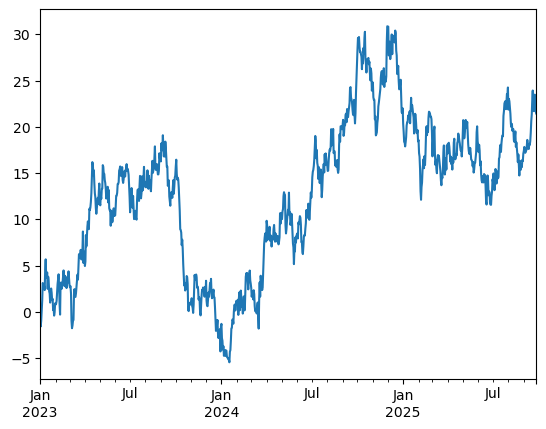

In [126]:
ts.plot()

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

In [127]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df

,A,B,C,D
2023-01-01,0.205191,-0.372824,0.661915,-0.308036
2023-01-02,0.152014,-0.995903,-0.421722,1.332621
2023-01-03,0.292945,-1.168323,-1.974502,0.825475
2023-01-04,-0.793733,0.172062,-0.887225,0.794429
2023-01-05,0.303919,-0.991363,-0.287142,-0.837062
...,...,...,...,...
2025-09-22,1.104410,2.141313,1.363344,0.068153
2025-09-23,0.436171,0.082910,-1.133586,0.155596
2025-09-24,0.919537,-1.462166,0.274569,-0.217224
2025-09-25,0.309003,-0.415077,-0.723517,-0.312430


In [128]:
df = df.cumsum()
df

,A,B,C,D
2023-01-01,0.205191,-0.372824,0.661915,-0.308036
2023-01-02,0.357205,-1.368727,0.240192,1.024586
2023-01-03,0.650150,-2.537050,-1.734310,1.850061
2023-01-04,-0.143583,-2.364988,-2.621535,2.644490
2023-01-05,0.160337,-3.356351,-2.908677,1.807427
...,...,...,...,...
2025-09-22,19.619537,74.424493,-16.127490,-18.413635
2025-09-23,20.055708,74.507403,-17.261076,-18.258039
2025-09-24,20.975245,73.045237,-16.986507,-18.475263
2025-09-25,21.284248,72.630161,-17.710025,-18.787693


<Figure size 640x480 with 0 Axes>

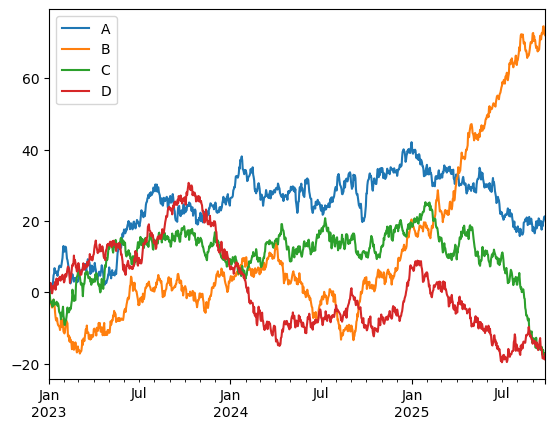

In [129]:
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [130]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [131]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2023-01-01,0.205191,-0.372824,0.661915,-0.308036
1,2023-01-02,0.357205,-1.368727,0.240192,1.024586
2,2023-01-03,0.650150,-2.537050,-1.734310,1.850061
3,2023-01-04,-0.143583,-2.364988,-2.621535,2.644490
4,2023-01-05,0.160337,-3.356351,-2.908677,1.807427
...,...,...,...,...,...
995,2025-09-22,19.619537,74.424493,-16.127490,-18.413635
996,2025-09-23,20.055708,74.507403,-17.261076,-18.258039
997,2025-09-24,20.975245,73.045237,-16.986507,-18.475263
998,2025-09-25,21.284248,72.630161,-17.710025,-18.787693


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [132]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [133]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2023-01-01,0.205191,-0.372824,0.661915,-0.308036
1,2023-01-02,0.357205,-1.368727,0.240192,1.024586
2,2023-01-03,0.650150,-2.537050,-1.734310,1.850061
3,2023-01-04,-0.143583,-2.364988,-2.621535,2.644490
4,2023-01-05,0.160337,-3.356351,-2.908677,1.807427
...,...,...,...,...,...
995,2025-09-22,19.619537,74.424493,-16.127490,-18.413635
996,2025-09-23,20.055708,74.507403,-17.261076,-18.258039
997,2025-09-24,20.975245,73.045237,-16.986507,-18.475263
998,2025-09-25,21.284248,72.630161,-17.710025,-18.787693
